Original Data (first 5 rows):
      Values
0   6.668343
1   4.012397
2   7.524399
3  15.156416
4   3.716111

Original Data Description:
           Values
count  200.000000
mean     5.767376
std      5.186743
min      0.551125
25%      2.549526
50%      4.466810
75%      6.690567
max     39.493471


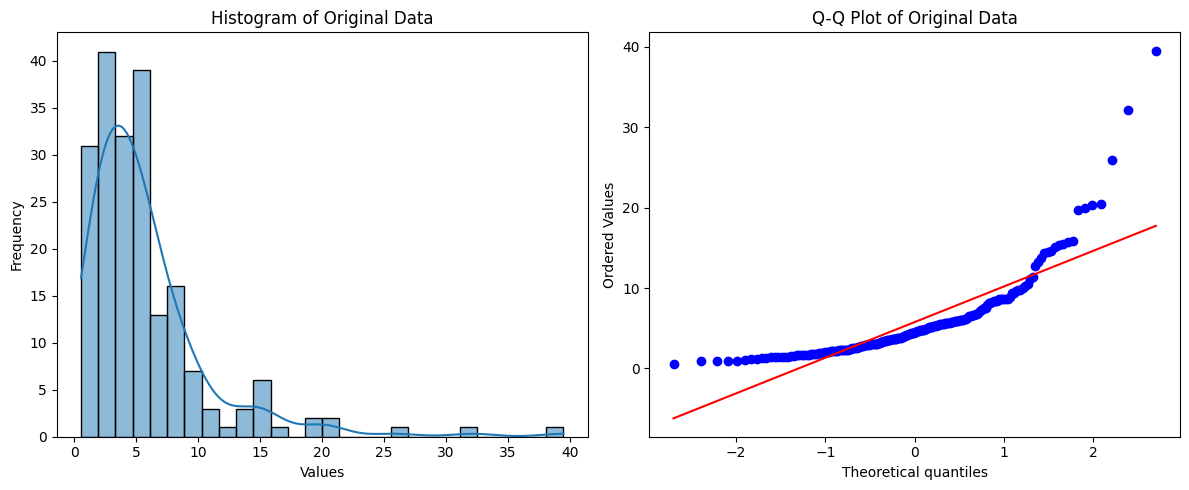


Estimated Lambda (λ) for Box-Cox: -0.0602

Data after Box-Cox Transformation (first 5 rows):
      Values  Values_BoxCoxTransformed
0   6.668343                  1.793065
1   4.012397                  1.332894
2   7.524399                  1.900422
3  15.156416                  2.507729
4   3.716111                  1.262172

Box-Cox Transformed Data Description:
count    200.000000
mean       1.389284
std        0.680851
min       -0.606603
25%        0.910032
50%        1.431230
75%        1.796017
max        3.297933
Name: Values_BoxCoxTransformed, dtype: float64


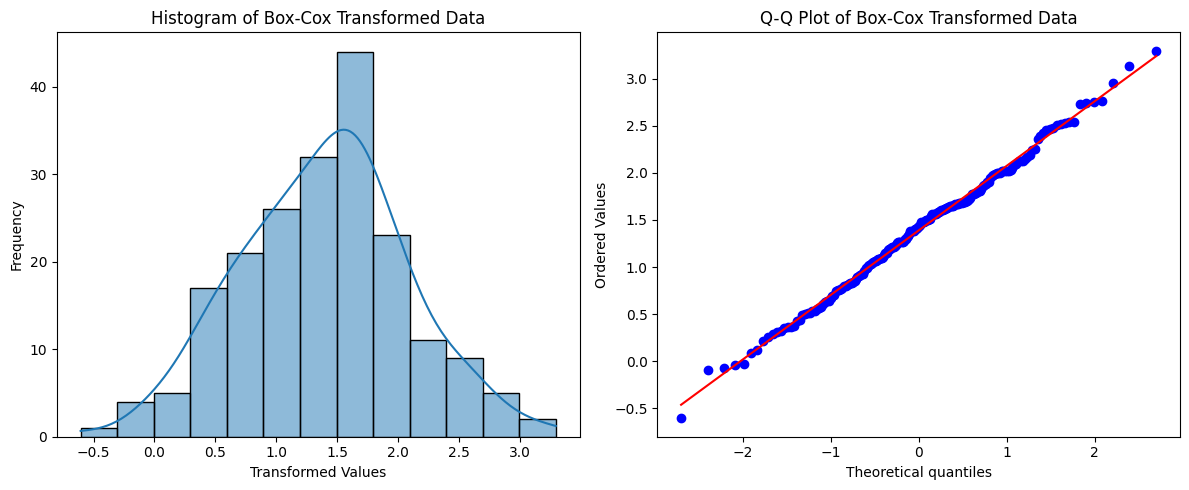

In [1]:
# Question: Power Transformation (Box-Cox) Method
# Description: Use Box-Cox transformation to stabilize variance and make the data more normal.
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import boxcox, probplot # boxcox for the transformation, probplot for Q-Q plot
import matplotlib.pyplot as plt
import seaborn as sns

# --- Create a sample dataset with a non-normal distribution (e.g., skewed) ---
# Let's create a dataset with positive values that are right-skewed.
# We'll use a log-normal distribution for this example, which is often skewed in real-world data.
np.random.seed(42) # Setting a seed for reproducibility of the random data
# Generate data from a log-normal distribution with specified mean and sigma.
# Add a small constant (1e-6) to ensure all values are strictly positive,
# as Box-Cox requires positive input data.
data = np.random.lognormal(mean=1.5, sigma=0.8, size=200) + 1e-6
df = pd.DataFrame({'Values': data})

print("Original Data (first 5 rows):")
print(df.head())
print("\nOriginal Data Description:")
# Describe the original data to see its summary statistics (mean, std, min, max, quartiles).
print(df.describe())

# --- Visualize the original data distribution ---
# Use a histogram to see the shape of the distribution and a Q-Q plot to check for normality.
plt.figure(figsize=(12, 5)) # Set the figure size for better visualization

# Subplot 1: Histogram
plt.subplot(1, 2, 1) # Create a grid of 1 row and 2 columns, and select the 1st plot
sns.histplot(df['Values'], kde=True) # Create a histogram with a Kernel Density Estimate (KDE) line
plt.title('Histogram of Original Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Subplot 2: Q-Q plot
plt.subplot(1, 2, 2) # Select the 2nd plot in the 1x2 grid
probplot(df['Values'], dist="norm", plot=plt) # Generate a Q-Q plot comparing data against a normal distribution
plt.title('Q-Q Plot of Original Data')

plt.tight_layout() # Adjust layout to prevent titles/labels from overlapping
plt.show() # Display the plots

# --- Apply Box-Cox Transformation ---
# Use scipy.stats.boxcox to apply the transformation.
# This function automatically estimates the optimal lambda (λ) value for the data.
# The input data MUST be strictly positive.
try:
    # boxcox returns the transformed data and the estimated lambda value.
    transformed_values, lambda_value = boxcox(df['Values'])

    # Add the transformed values to the DataFrame as a new column
    df['Values_BoxCoxTransformed'] = transformed_values

    print(f"\nEstimated Lambda (λ) for Box-Cox: {lambda_value:.4f}")
    print("\nData after Box-Cox Transformation (first 5 rows):")
    print(df.head())
    print("\nBox-Cox Transformed Data Description:")
    # Describe the transformed data to see how the statistics have changed.
    print(df['Values_BoxCoxTransformed'].describe())

    # --- Visualize the transformed data distribution ---
    # Use a histogram and a Q-Q plot again to see the effect of the transformation on the distribution.
    plt.figure(figsize=(12, 5)) # Set the figure size

    # Subplot 1: Histogram of transformed data
    plt.subplot(1, 2, 1) # 1st plot in the 1x2 grid
    sns.histplot(df['Values_BoxCoxTransformed'], kde=True) # Histogram with KDE
    plt.title('Histogram of Box-Cox Transformed Data')
    plt.xlabel('Transformed Values')
    plt.ylabel('Frequency')

    # Subplot 2: Q-Q plot of transformed data
    plt.subplot(1, 2, 2) # 2nd plot in the 1x2 grid
    probplot(df['Values_BoxCoxTransformed'], dist="norm", plot=plt) # Q-Q plot against a normal distribution
    plt.title('Q-Q Plot of Box-Cox Transformed Data')

    plt.tight_layout() # Adjust layout
    plt.show() # Display the plots

    # --- Interpretation ---
    # By comparing the histograms and Q-Q plots before and after transformation,
    # you should visually see that the transformed data's distribution is closer to normal.
    # The histogram should be more symmetric, and the points in the Q-Q plot should align better
    # with the straight line, which represents the theoretical quantiles of a normal distribution.
    # The describe() output will show that the mean and median are likely closer after transformation.

except ValueError as e:
    # Handle the case where the input data contains non-positive values, as Box-Cox requires positive data.
    print(f"\nError applying Box-Cox transformation: {e}")
    print("Box-Cox requires input data to be strictly positive.")
    print("Consider adding a constant to your data to make it positive, or using an alternative like Yeo-Johnson transformation.")



